In [1]:
import pymaid
from pymaid import tiles

# HTTP_USER AND HTTP_PASSWORD are only necessary if your server 
# requires a http authentification
rm = pymaid.CatmaidInstance('www.your.catmaid-server.org' , 
                            'HTTP_USER' , 
                            'HTTP_PASSWORD', 
                            'TOKEN')

INFO  : Global CATMAID instance set. (pymaid)


In [2]:
# Get a neuron
n = pymaid.get_neuron(16)
# Pick a random synapse
center = n.connectors.sample(1).iloc[0][['x', 'y', 'z']].values
center

array([379172, 146340, 184240])

In [3]:
min_co = center - 5000
max_co = center + 5000
bbox = [c for co in zip(min_co[:2], max_co[:2]) for c in co] + [center[2]]
bbox

[374172, 384172, 141340, 151340, 184240]

In [4]:
job = tiles.LoadTiles(bbox, stack_id=5)

INFO  : Fastest image mirror: https://flyemdev.mrc-lmb.cam.ac.uk/fafb-tiles/ (pymaid)
INFO  : Estimated memory usage: 75.50 Mb (pymaid)


In [5]:
job.load_in_memory()

In [6]:
job.img.shape

(2500, 2500, 1)

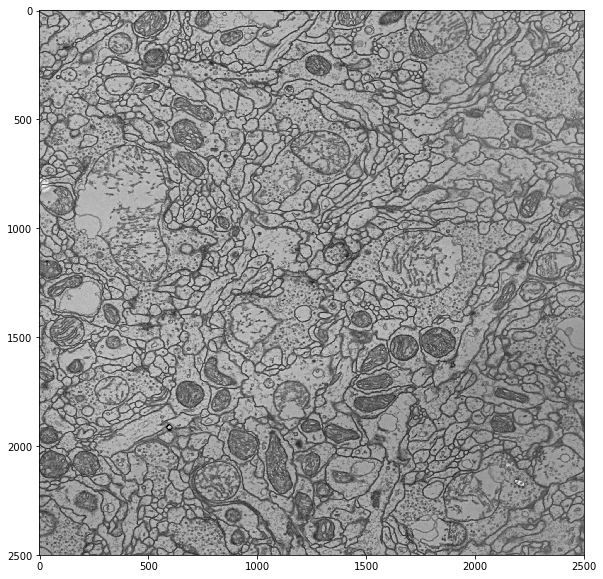

In [7]:
import matplotlib.pyplot as plt

ax = job.render_im(figsize=(12,12))
plt.show()

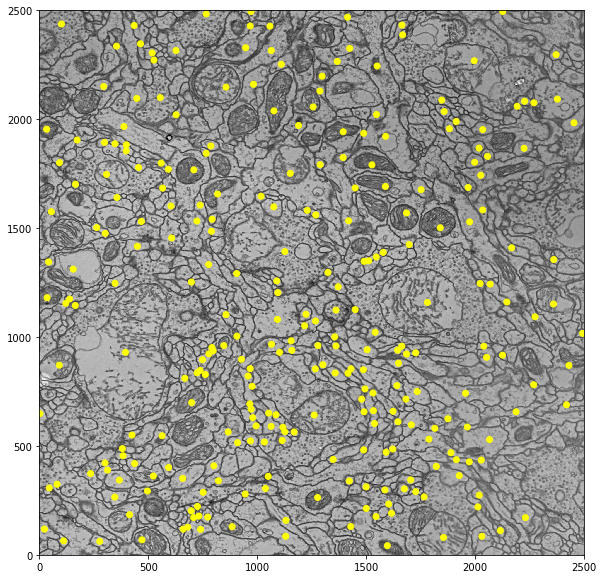

In [8]:
# First render the image
ax = job.render_im(figsize=(12,12))

# Now add the nodes
job.render_nodes(ax, treenodes=True, connectors=False)

# Readjust the figure limits
ax.set_xlim(0,2500)
ax.set_ylim(0,2500)

plt.show()

In [9]:
# Get skeleton IDs of all uPNs
upn = pymaid.get_skids_by_annotation('uPN')

# Generate a random color for each uPN
from colorsys import hsv_to_rgb
cmap = {n: hsv_to_rgb(1/len(upn)*i, 1, 1) for i, n in enumerate(upn)}

INFO  : Looking for Annotation(s): uPN (pymaid)
INFO  : Found 149 skeletons with matching annotation(s) (pymaid)


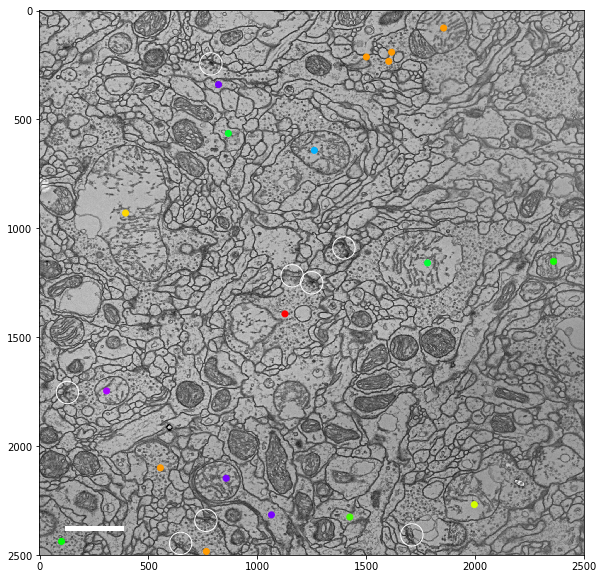

In [10]:
# Render image
ax = job.render_im(slider=False, figsize=(12,12))

# Add treenodes
job.render_nodes(ax, 
                 treenodes=True,
                 connectors=True,
                 skid_include=upn, # show only uPNs
                 tn_color=cmap, # apply colormap
                 cn_kws={'s':500, # make connectors larger
                         'edgecolor':'w'} # make connectors white
                )

# Add 1um scalebar
job.scalebar(size=1000, ax=ax, label=False, line_kws={'color':'w', 'lw':5})

# Show
plt.show()